In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\David gathara marigi\Downloads\itunes_data.csv")

In [3]:
df['Minutes'] = df['Milliseconds'] / (1000 * 60) 
df['MB'] = df['Bytes'] / 1000000

In [4]:
df.drop(['Milliseconds', 'Bytes'], axis=1, inplace=True)

<Axes: >

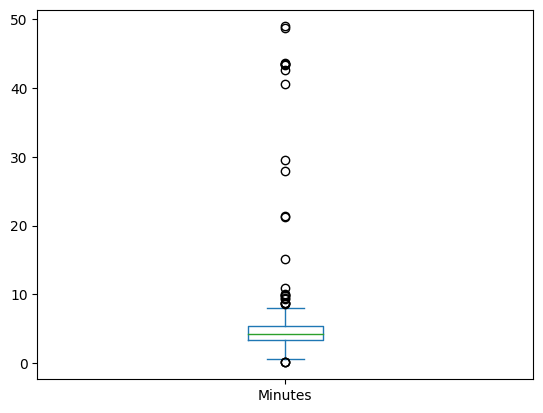

In [5]:
df['Minutes'].plot.box()

In [6]:
Q1 = df['Minutes'].quantile(0.25)
Q3 = df['Minutes'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['Minutes'] < (Q1 - 1.5 * IQR)) | (df['Minutes'] > (Q3 + 1.5 * IQR))
#print(outliers.sum())
print(outliers)

0       True
1      False
2      False
3       True
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: Minutes, Length: 303, dtype: bool


Axes(0.125,0.11;0.775x0.77)


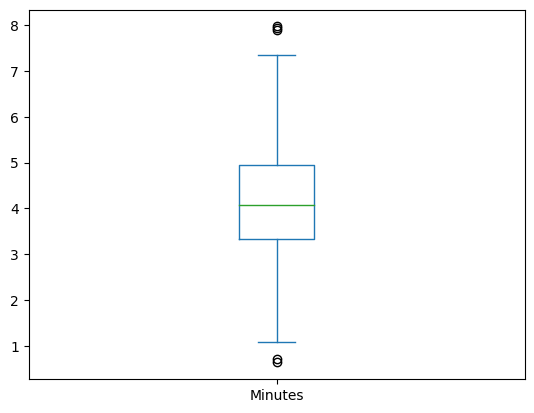

In [7]:
# remove outliers
df = df[~outliers]
print(df['Minutes'].plot.box())

In [8]:
import seaborn as sns

<Axes: ylabel='Minutes'>

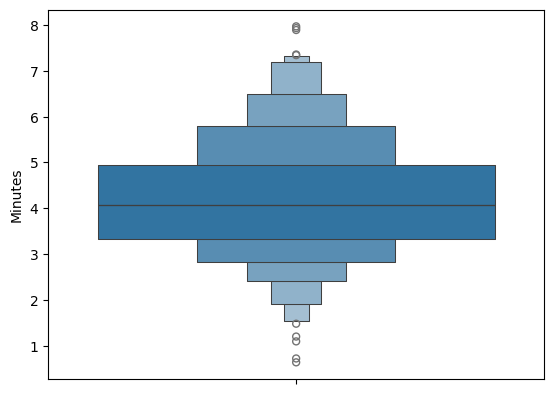

In [9]:
sns.boxenplot(y = df['Minutes'])

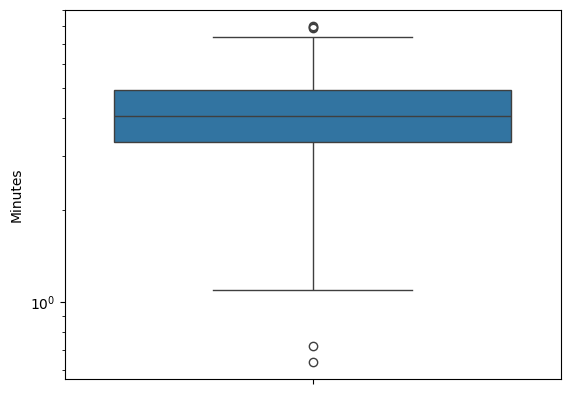

In [10]:
import matplotlib.pyplot as plt
sns.boxplot(y = df['Minutes'])
plt.yscale('log')

                               Making histograms and violin plots

<Axes: xlabel='Minutes', ylabel='Count'>

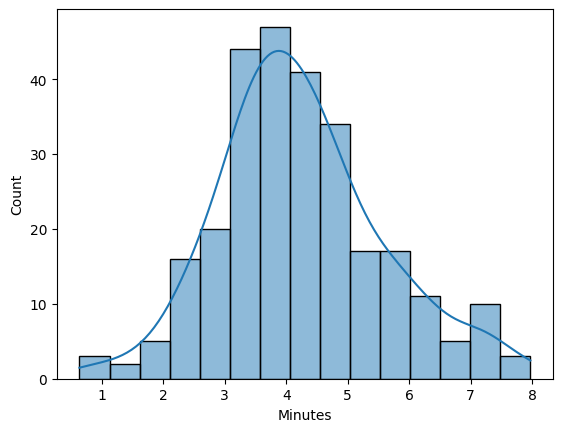

In [11]:
sns.histplot(x=df['Minutes'], kde=True)

<Axes: xlabel='Minutes'>

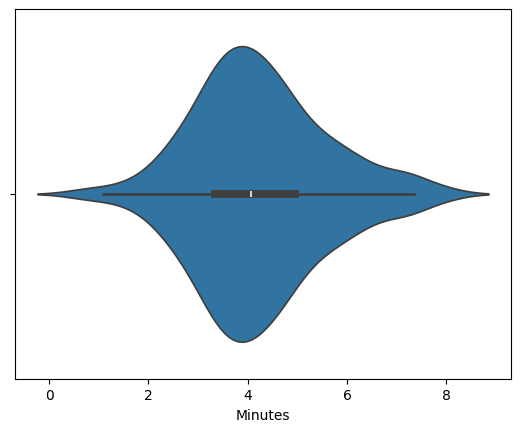

In [12]:
sns.violinplot(data=df, x='Minutes')

In [13]:
top_5_genres = df['Genre'].value_counts().index[:5] 
top_5_data = data=df[df['Genre'].isin(top_5_genres)]

<Axes: xlabel='Minutes', ylabel='Genre'>

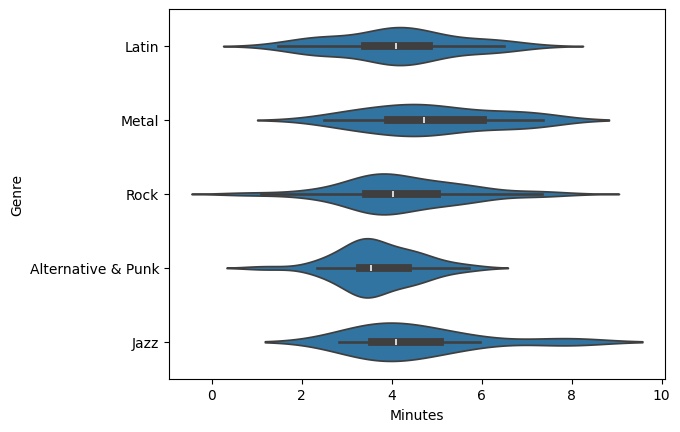

In [14]:
sns.violinplot(data=top_5_data, x='Minutes', y='Genre')

                                   Making scatter plots with Matplotlib and Seaborn

Text(0, 0.5, 'MB')

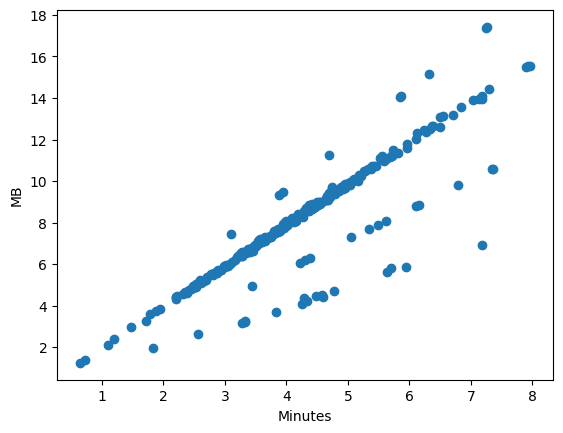

In [15]:
plt.scatter(df['Minutes'], df['MB'])
plt.xlabel('Minutes') 
plt.ylabel('MB')

<Axes: xlabel='Minutes', ylabel='MB'>

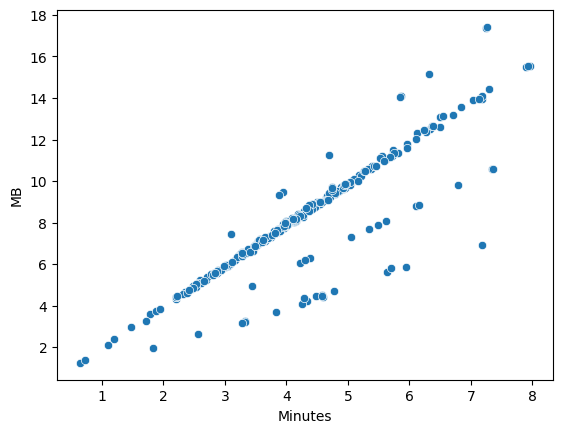

In [16]:
sns.scatterplot(data=df, x='Minutes', y='MB')

<Axes: xlabel='Minutes', ylabel='MB'>

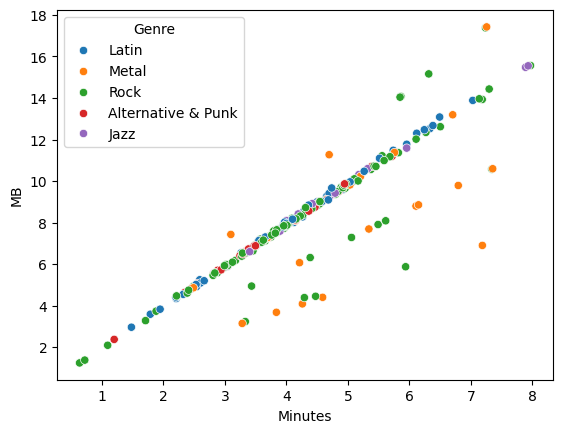

In [17]:
sns.scatterplot(data=top_5_data, x='Minutes', y='MB', hue='Genre')

                              Examining correlations and making correlograms

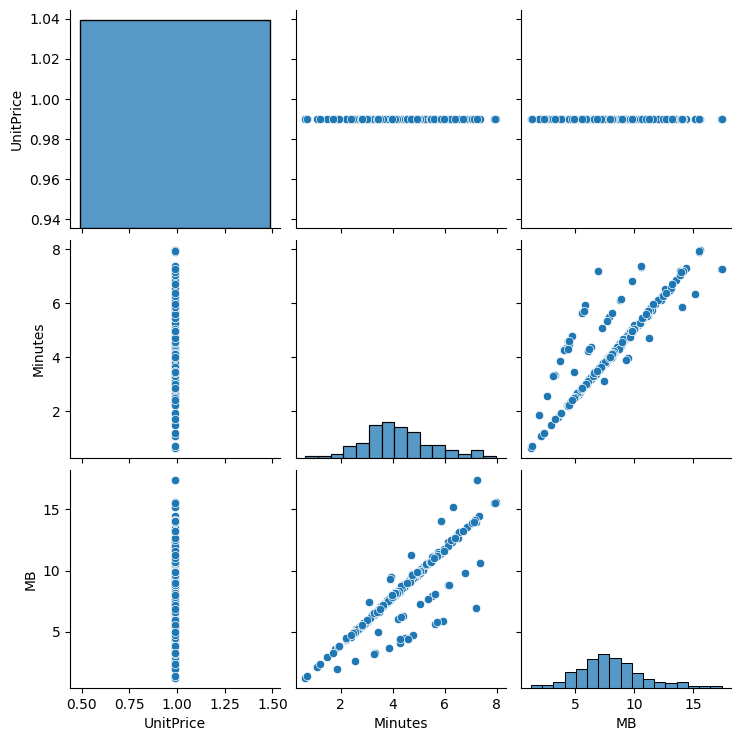

In [18]:
sns.pairplot(data=df)

<Axes: >

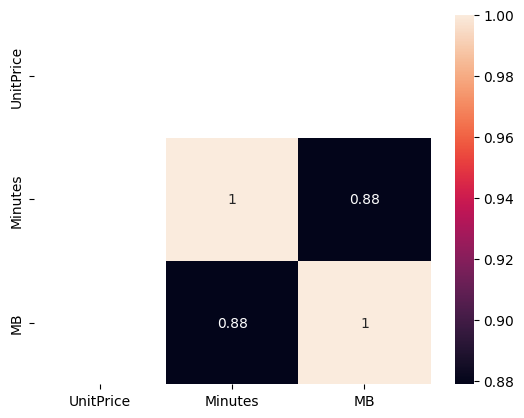

In [19]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)

<Axes: >

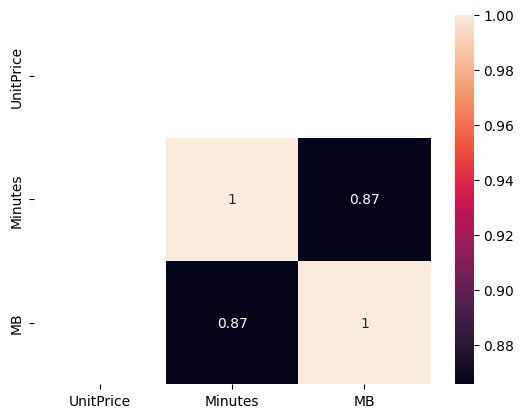

In [20]:
sns.heatmap(df.select_dtypes(include=np.number).corr(method='spearman'), annot=True)

                                      Making missing value plots

<Axes: >

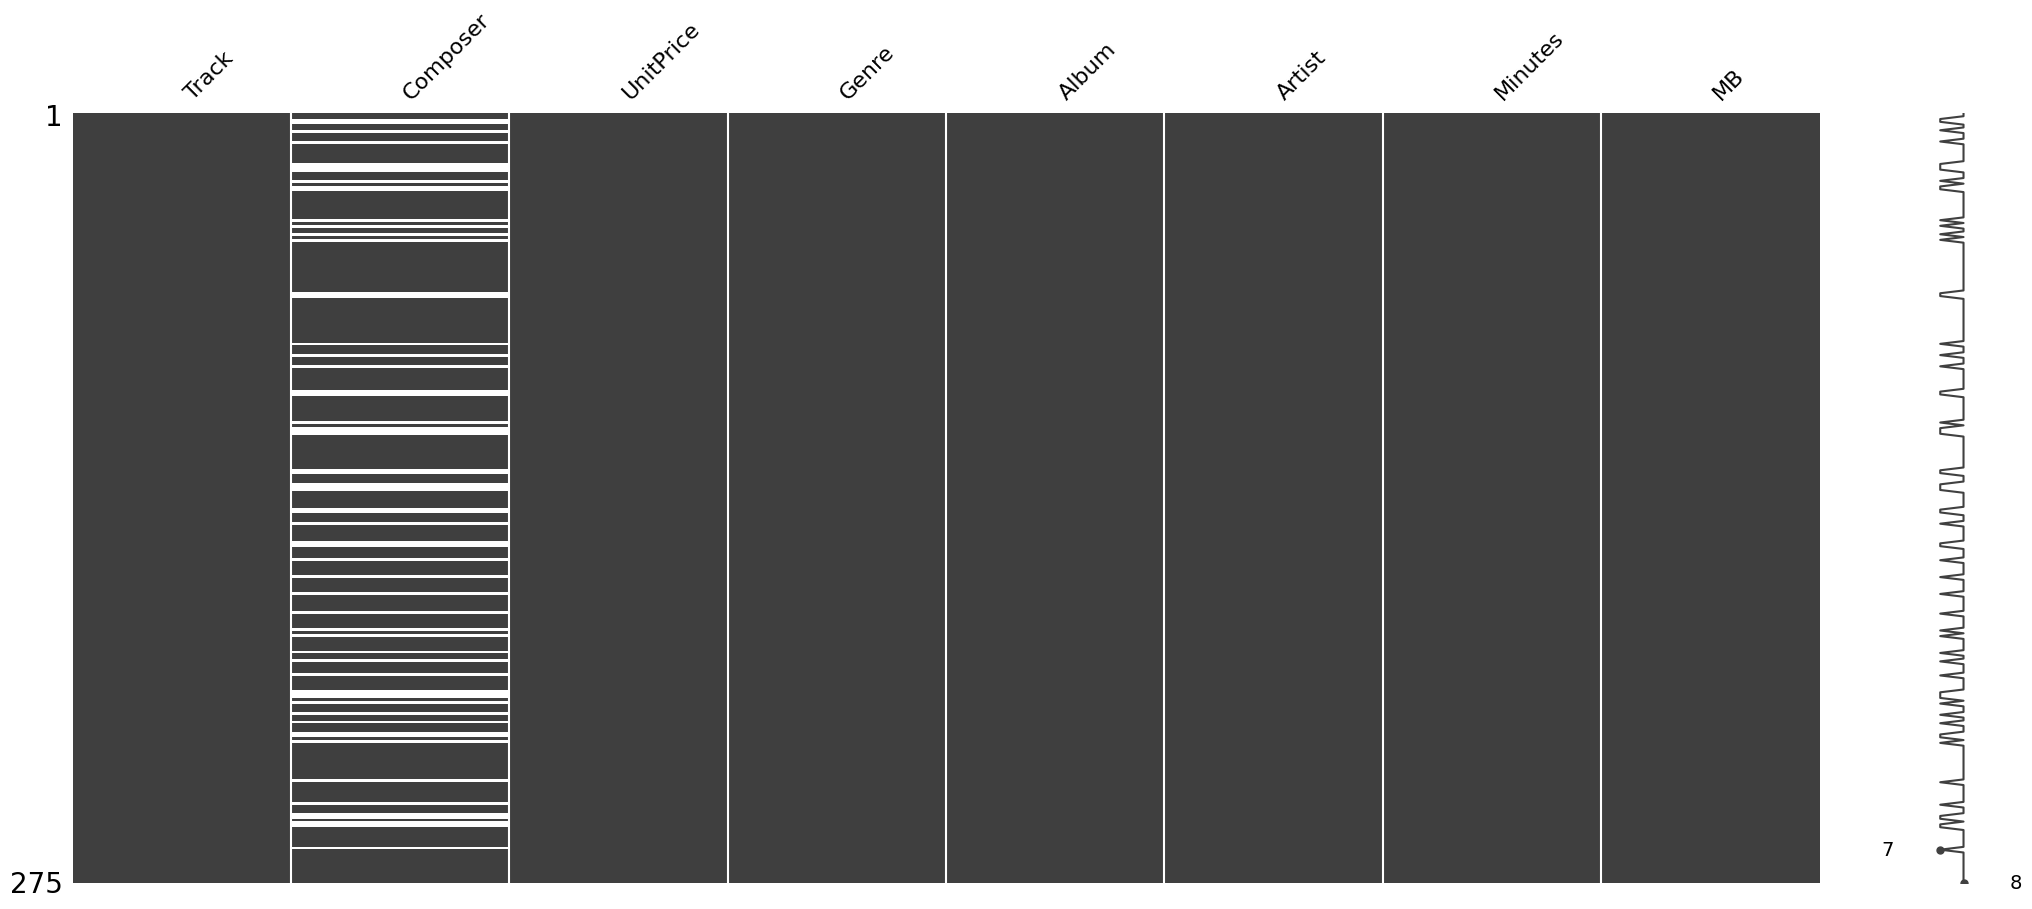

In [21]:
import missingno as msno 
msno.matrix(df)

In [22]:
#report = ProfileReport(df)

<Axes: ylabel='Frequency'>

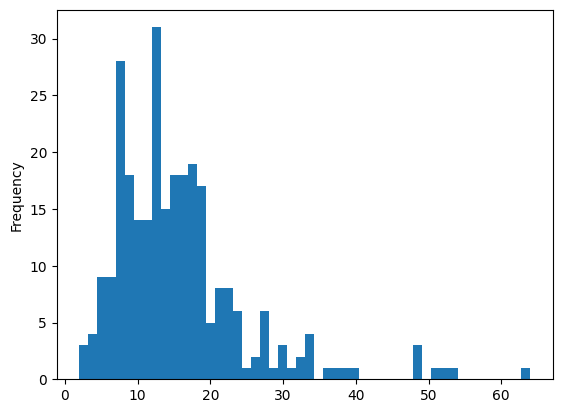

In [23]:
df['Track'].str.len().plot.hist(bins=50)

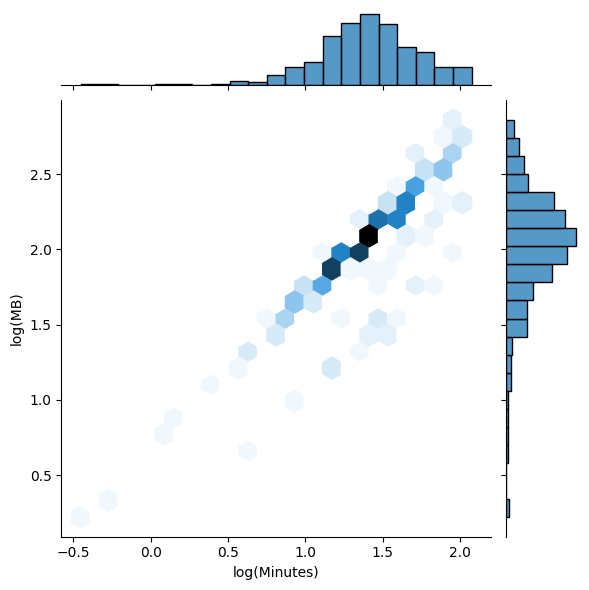

In [24]:
import numpy as np 
df_log = df.copy() 
df_log['log(Minutes)'] = np.log(df_log['Minutes']) 
df_log['log(MB)'] = np.log(df_log['MB']) 
sns.jointplot(x="log(Minutes)", y="log(MB)", data=df_log, kind="hex") 

                                  Using visualization best practices

<Axes: xlabel='Genre'>

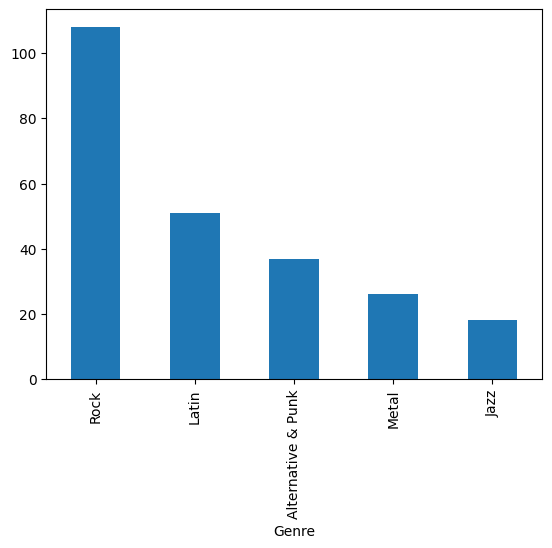

In [25]:
df['Genre'].value_counts()[:5].plot.bar()

<Axes: xlabel='count', ylabel='Genre'>

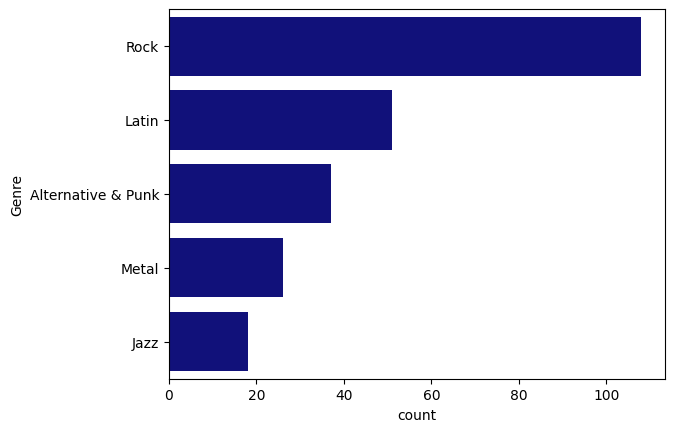

In [26]:
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index[:5], color='darkblue')

In [27]:
from sqlalchemy import create_engine 
engine = create_engine(r"sqlite:///C:\Users\David gathara marigi\Downloads\chinook.db") 
with engine.connect() as connection: 
    sql_df = pd.read_sql_table('invoices', connection)

In [28]:
top_3_countries = sql_df.groupby('BillingCountry')['Total'].sum().sort_values(ascending=False)[:3].index.values

In [29]:
if 'InvoiceDate' in sql_df.columns:
    sql_df.set_index('InvoiceDate', inplace=True)
gb = sql_df[sql_df['BillingCountry'].isin(top_3_countries)].groupby([pd.Grouper(freq='M'), 'BillingCountry']).sum(numeric_only=True).groupby(level=-1).cumsum() 
gb.reset_index(inplace=True)

<Axes: xlabel='InvoiceDate', ylabel='Total'>

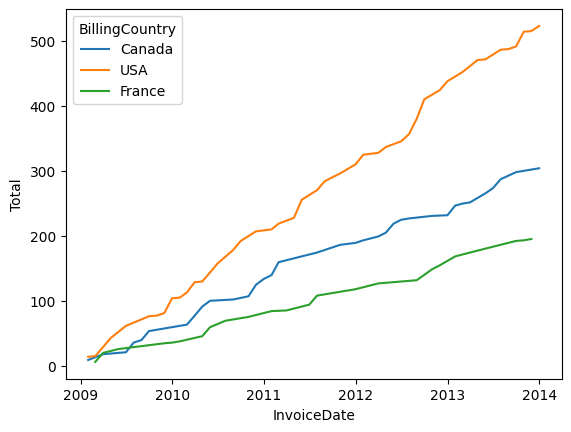

In [30]:
sns.lineplot(data=gb, x='InvoiceDate', y='Total', hue='BillingCountry') 

<Axes: xlabel='InvoiceDate', ylabel='Total'>

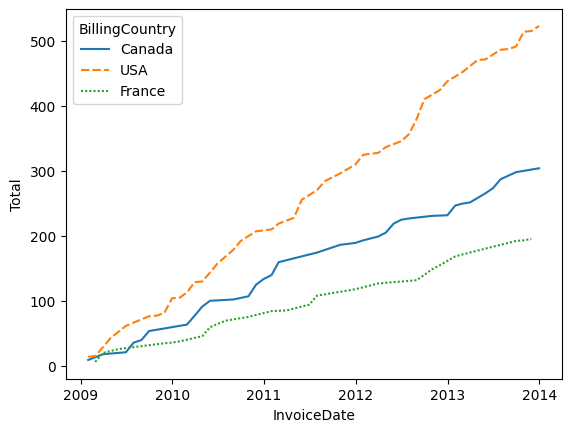

In [31]:
sns.lineplot(data=gb, x='InvoiceDate', y='Total', hue='BillingCountry', style='BillingCountry')

Text(0, 0.5, 'Cumulative Sales ($)')

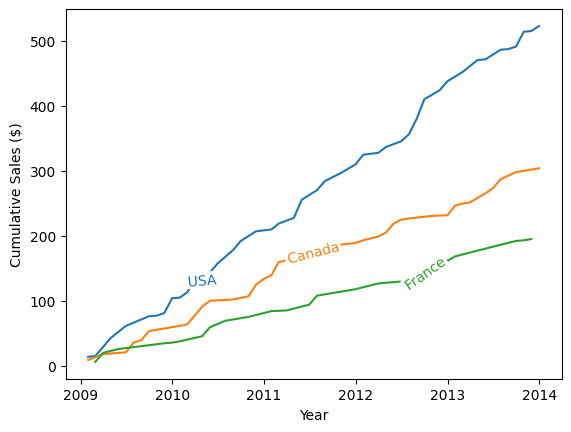

In [32]:
from labellines import labelLines 
f = plt.figure() 
ax = f.gca() 
for country in top_3_countries: 
    c_df = gb[gb['BillingCountry'] == country] 
    ax.plot(c_df['InvoiceDate'], c_df['Total'], label=country) 
labelLines(ax.get_lines()) 
plt.xlabel('Year') 
plt.ylabel('Cumulative Sales ($)')

<Axes: xlabel='InvoiceDate', ylabel='Total'>

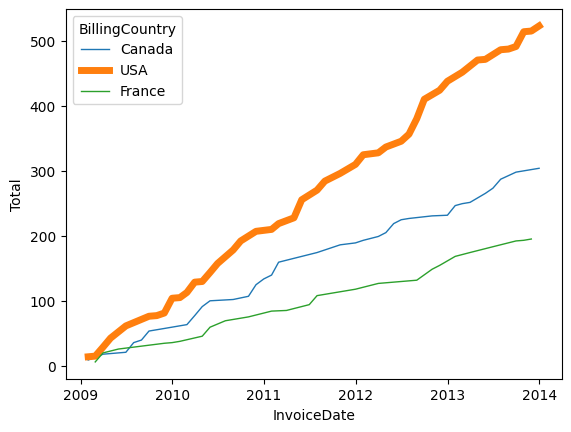

In [33]:
sns.lineplot(data=gb, x='InvoiceDate', y='Total', 
hue='BillingCountry', size='BillingCountry', sizes=[1, 5, 1])

                                        Saving plots for sharing and reports

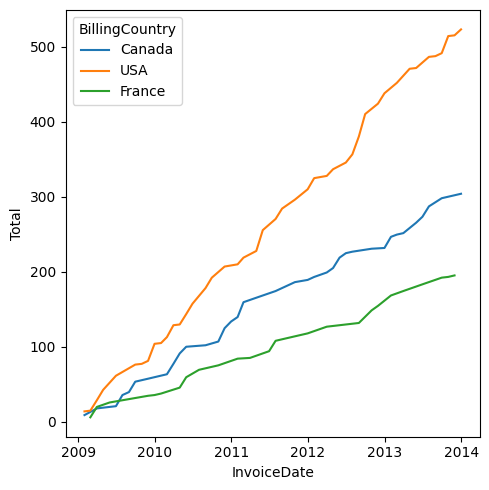

In [34]:
f = plt.figure(figsize=(5, 5)) 
sns.lineplot(data=gb, x='InvoiceDate', y='Total', 
hue='BillingCountry') 
plt.tight_layout() 
plt.savefig('cumulative_sales_lineplot.png', facecolor='w', 
dpi=300) 

                                                  
                                                Making plots with Plotly

In [35]:
import plotly.express as px 
px.line(gb, x='InvoiceDate', y='Total', color='BillingCountry', template='simple_white')

In [36]:
px.scatter(df, x='Minutes', y='MB')

In [37]:
px.histogram(df, x='Minutes')

In [38]:
gb_countries = sql_df.groupby('BillingCountry').sum() 
gb_countries.reset_index(inplace=True) 
px.choropleth(gb_countries, locations="BillingCountry", 
              locationmode='country names', 
              color="Total")